### Imports

In [ ]:
import pytrends
import numpy as np
import pandas as pd
import requests
import lxml
import datetime
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


num = 3000
pd.set_option('display.max_columns', num)
pd.set_option('display.max_rows', num)
pd.set_option('display.max_colwidth', num)


### Functions

In [ ]:
def query_entry(num_queries):

    """
    Get user input for queries
    """
    query_list = []
    
    i = 0

    for i in range(num_queries):
        query_list.append(input("Please enter keyword for query: "))
        
    return query_list

In [ ]:
def num_of_queries():
    
    """
    Get number of queries
    """
    num = int(input("Please enter number of queries to search and compare(max 5): "))

    if num > 5 or num < 0:
        while num > 5 or num < 0:
            num = int(input("Please enter number of queries to search and compare(max 5): "))


    return num
    

### Opens Google.Trends request

In [ ]:
from pytrends.request import TrendReq

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq(hl='en-US', tz=360, timeout=(10,25), retries=2, backoff_factor=0.3)

master_df = pd.DataFrame()

### Payload Customization Section

In [10]:
# Create payload and capture API tokens. 
# Only needed for interest_over_time(), interest_by_region() & related_queries()
# Up to five terms in a list

# Either start from today and go back up to 5 years, #-(H, d, m, y) for # of Hours, days, months, or years
# OR give a timeframe of two dates in 'YYYY-MM-DD YYYY-MM-DD' format
# If Given a 500 error code, it is Google issue with query, may see request as spam or sketchy code
# OR data is unavailable for timeframe
user_timeframe = 'today 12-m' 

#Country of interest, leave empty for global interest
user_geo = 'US'

user_kw_list = []

num_queries = num_of_queries()

user_kw_list = query_entry(num_queries)

Please enter number of queries to search and compare(max 5): 3
Please enter keyword for query: Chase
Please enter keyword for query: Wells Fargo
Please enter keyword for query: Capital One


### API use

In [11]:
#Builds trend data pull
pytrend.build_payload(kw_list = user_kw_list, timeframe = user_timeframe, geo=user_geo)

### Interest Over Time Comparison

In [12]:
# Interest Over Time
# Google Trends does not relay specific view counts of topics.
# Simply, the numbers correlate to relative virality of a topic,
# where 100 is maximum trend and 0 is minimum trend

# interest over time provides weekly intervals for trend analysis
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df

,Chase,Wells Fargo,Capital One,isPartial
date,,,,
2019-05-26,77,78,32,False
2019-06-02,82,83,35,False
2019-06-09,81,78,34,False
2019-06-16,81,78,34,False
2019-06-23,82,82,34,False
2019-06-30,82,85,34,False
2019-07-07,80,79,35,False
2019-07-14,80,79,34,False
2019-07-21,78,75,33,False


### Interest Over Time Plot

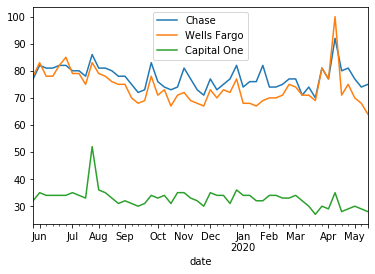

In [13]:
interest_over_time_df.plot()

### Interest by Region

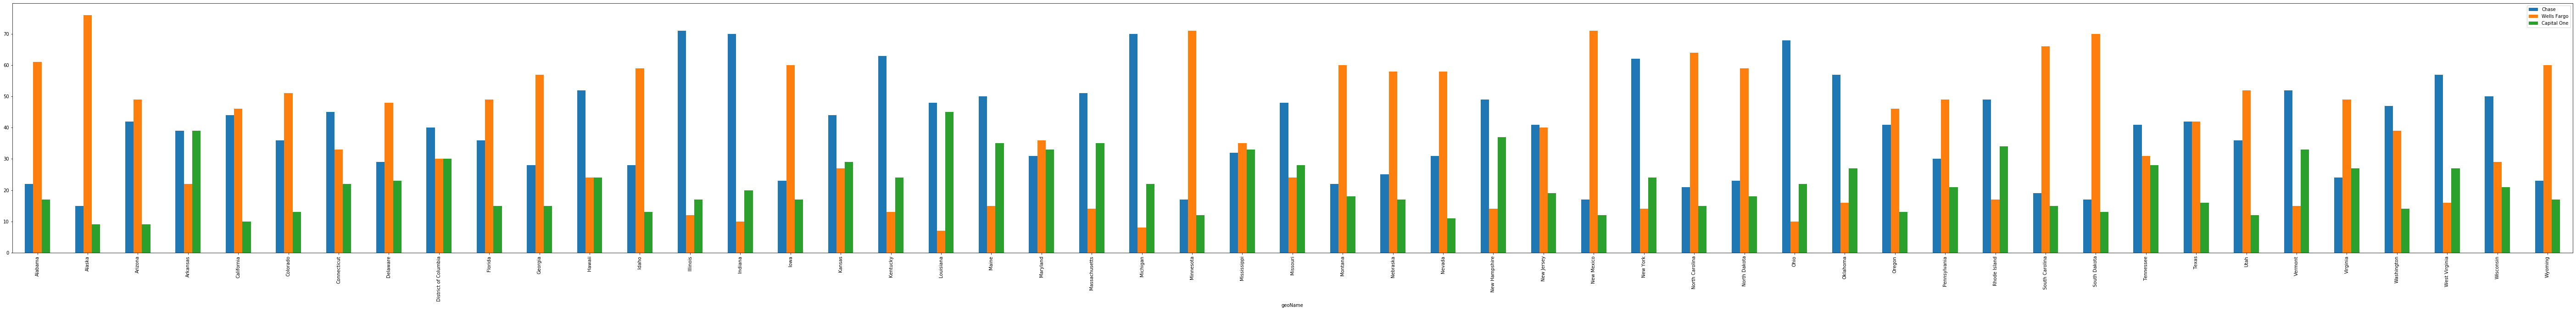

In [14]:
# Interest by Region
# The values are calculated on a scale from 0 to 100, 
# where 100 is the location with the most popularity as a fraction of total 
# searches in that location, a value of 50 indicates a location which is half as popular. 
# A value of 0 indicates a location where there was not enough data for this term.
interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)

#Plots interest by region per state within selected timeframe
interest_by_region_df.plot(figsize=(100, 10), kind ='bar')

    

### Related Queries, which requires payload with only one item

In [8]:

# Related Queries, returns a dictionary of dataframes

# For Top, values are calculated on a scale from 0 to 100, 
# where 100 is the location with the most popularity as a fraction of total 
# searches in that location, a value of 50 indicates a location which is half as popular. 
# A value of 0 indicates a location where there was not enough data for this term.

# For Rising, the values are uncertain but may be interpreted as rounded searches for timeframe
related_query = []

related_query.append(input("Insert Search Query for Top Related and Rising Related Searches: "))

# Optional line to check new list above
pytrend.build_payload(kw_list = related_query, timeframe = user_timeframe, geo=user_geo, cat='7')

# Uses the keyword to find recent trending searches using certain keyword
related_queries_dict = pytrend.related_queries()

# Top numbers are comparison of peak interest for topics
related_queries_dict[related_query[0]]['top']


# Rising numbers are percentage increase of search volume
related_queries_dict[related_query[0]]['rising']




Insert Search Query for Top Related and Rising Related Searches: Wells Fargo


,query,value
0,wells fargo ppp,13750
1,wells fargo paycheck protection program,3700
2,wells fargo mortgage relief,1450
3,wells fargo refinance mortgage rates,700
4,wells fargo refinance rates,550
5,wells fargo auto.com,450
6,wells fargo refinance,250
7,wells fargo mortgage rates,250
8,wells fargo stock,130
9,wells fargo rates,130
